# Find similary documents for a query document

依據文字的語義，計算文章之間的相似度

    (1)概念:取得每篇新聞的向量(768維度)表達，計算兩兩相似度，排序相似度，取得數篇相關新聞推薦。
    (2)新聞向量是BERT模型產生的，BERT語言模型是Google的一種NLP產品，它是由一種叫做Transformer(變形金剛、變壓器)的深度學習模型所訓練，訓練語料非常龐大:Wikipedia(約25億字)和Google的BooksCorpus(約8億字)。Google使用64個TPU訓練整整4天，花費超過22萬台幣，真正的成本還要包含開發實驗階段訓練失敗的次數、工程式的薪資等。
    (3)BERT的下游任務除了這裡的新聞推薦之外，還可以用在NLP理解的各種任務，包括我們下一次會提到的情緒分類、新聞分類等任務。
    (4)BERT目前已經發展成一個大家族，它可以讓電腦深入了解人類的語言與世界！🚀

    首先我們必須取得文字的向量(詞嵌入,詞向量)，之後就可以進行後續的應用。
    NLP下游任務非常多，之後的課程將會做情緒分類，新聞文章做分類等下游任務。
    此處我們進行較簡單的應用:比較文章語義相似性，可以做相似文章內容的推薦系統。

# Word vector詞向量, Word embedding詞嵌入

What is Word Embedding? 

"word embedding" or "word vector"

"詞嵌入" or "詞向量"

    Word Embedding is a type of word representation that allows words with similar meaning to be understood by machine learning algorithms. 

    Technically speaking, it is a mapping of words into vectors of real numbers using the neural network, probabilistic model, or dimension reduction on word co-occurrence matrix. 

    It is language modeling and feature learning technique. Word embedding is a way to perform mapping using a neural network. 

    There are various word embedding models available such as word2vec (Google), Glove (Stanford) and fastext (Facebook).

    Reference:
    https://www.guru99.com/word-embedding-word2vec.html

![](https://www.researchgate.net/profile/Le-Lu-9/publication/303376372/figure/fig6/AS:668376489816091@1536364781736/Example-words-embedded-in-the-vector-space-using-word-to-vector-modeling.png)

# Cosine similarity between two vectors計算兩兩向量特徵之相似度

cosine值 介於-1 ~ 1 之間  

cosine(0) = 1   0度cosine值越接近1 越相似!!

cosine(90) = 0  兩者無關

cosine(180) = -1  表示兩者意見相左 相反 



    Since the cos(θ) value is in the range [−1,1] :

    1 similar vectors (positive co-linear)
    0 independent vectors (orthogonal)
    −1 strongly opposite vectors
    
    Example : Let two user U1 and U2, and sim(U1,U2) the similarity between these two users according to their taste for movies:

    sim(U1,U2)=1 if the two users have exactly the same taste (or if U1=U2)
    
    sim(U1,U2)=0 if we do not find any correlation between the two users, e.g. if they have not seen any common movies

    sim(U1,U2)=−1 if users have opposed tastes, e.g. if they rated the same movies in an opposite way

    https://stats.stackexchange.com/questions/198810/interpreting-negative-cosine-similarity

![](https://adriancolyer.files.wordpress.com/2016/04/word2vec-king-queen-vectors.png?w=656&zoom=2)

<img src='https://pic3.zhimg.com/v2-fc17fd8286802d0ad2ff45e4068cc489_1200x500.jpg'>

Given two vectors of attributes, A and B, the cosine similarity, cos(θ), is represented using a dot product and magnitude as

<img src='https://i.stack.imgur.com/Qmq2w.png' style='background-color:white'>

where Ai and Bi are components of vector A and B respectively.

The resulting similarity ranges from −1 meaning exactly opposite, to 1 meaning exactly the same, with 0 indicating orthogonality or decorrelation, while in-between values indicate intermediate similarity or dissimilarity.

Reference:
https://www.wikiwand.com/en/Cosine_similarity

# Reasoning with word vectors

    The vectors are very good at answering analogy questions of the form a is to b as c is to ?. For example, man is to woman as uncle is to ? (aunt) using a simple vector offset method based on cosine distance.

For example, here are vector offsets for three word pairs illustrating the gender relation:

![](https://adriancolyer.files.wordpress.com/2016/04/word2vec-gender-relation.png?w=596&zoom=2)

![](https://adriancolyer.files.wordpress.com/2016/04/word2vec-plural-relation.png?w=610&zoom=2)

Reference: https://blog.acolyer.org/2016/04/21/the-amazing-power-of-word-vectors/

# BERT
    
<img src="https://riccardo-cantini.netlify.app/post/bert_text_classification/featured_hua8bf7d9829a3c2e45f4e3633adf00c19_474726_720x0_resize_lanczos_2.png">
   
    What is BERT?
    Bidirectional Encoder Representations from Transformers (BERT) is a Natural Language Processing Model proposed by Google Research in 2018. It is based on a multi-layer bidirectional Transformer, pre-trained on two unsupervised tasks using a large crossdomain corpus:

    * Masked Language Modeling (MLM): 15% of the words in each sequence are replaced with a [MASK] token. The model then attempts to predict the masked words, based on the context provided by the non-masked ones.
    * Next Sentence Prediction (NSP): the model receives pairs of sentences as input and learns to predict if the second sentence is the subsequent sentence in the original document.
    
    BERT is deeply bidirectional, which means that it can learn the context of a word based on all the information contained in the input sequence, joinlty considering previous and subsequent tokens. In fact, the use of MLM objective enables the representation to fuse the left and right contexts, allowing the pre-training of a deep bidirectional language representation model. This is a key difference comparing to previous language representation models like OpenAI GPT, which uses a unidirectional (left-to-right) language model, or ELMo, which uses a shallow concatenation of independently trained left-to-right and right-to-left language models. BERT outperformed many task-specific architectures, advancing the state of the art in a wide range of Natural Language Processing tasks, such as textual entailment, text classification and question answering.

    For further details, you might want to read the original BERT paper.

    什麼是 BERT？
    模型來自 Transformers 的雙向編碼器表示 (BERT)是 Google Research 在 2018 年提出的自然語言處理模型。它基於多層雙向 Transformer，使用大型跨域語料庫對兩個無監督任務進行預訓練。

    大量的訓練數據

        33 億字的海量數據集

        BERT 專門針對 Wikipedia（約 2.5B 字）和 Google 的 BooksCorpus（約 8 億字）進行了訓練。這些大型信息數據集不僅有助於 BERT 深入了解語言，還有助於了解我們的世界！🚀

        在這麼大的數據集上訓練需要很長時間。BERT 的訓練得益於新穎的 Transformer 架構，並通過使用 TPU（張量處理單元——谷歌專為大型 ML 模型構建的定制電路）加快了訓練速度。— 64 個 TPU 在 4 天的時間裡訓練了 BERT。


    * 掩碼語言建模 (MLM)：每個序列中 15% 的單詞被替換為一個[MASK]標記。然後，該模型嘗試根據非蒙面詞提供的上下文來預測蒙面詞。
    * Next Sentence Prediction (NSP)：模型接收成對的句子作為輸入，並學習預測第二個句子是否是原始文檔中的後續句子。
    
    BERT 是深度雙向的，這意味著它可以根據輸入序列中包含的所有信息來學習單詞的上下文，同時考慮前後標記。事實上，MLM 目標的使用使表示能夠融合左右上下文，從而允許對深度雙向語言表示模型進行預訓練。這是與以前的語言表示模型（如OpenAI GPT ）相比的關鍵區別，OpenAI GPT使用單向（從左到右）語言模型或 ELMo，它使用獨立訓練的從左到右和從右到左語言模型的淺連接。BERT 優於許多特定於任務的架構，在廣泛的自然語言處理任務（例如文本蘊涵、文本分類和問答）中提升了最新技術水平。

    有關更多詳細信息，您可能需要閱讀原始BERT 論文。
    
    source: https://riccardo-cantini.netlify.app/post/bert_text_classification/



# BERT Input and Output (輸入與輸出)




## Which output is proper for calculating doc vector similarity?

取用哪一個向量? 至少有4種可能方式:

    BERT的輸出有兩項:last_hidden_state, pooler_output
    我們採用以下三種方式:
    (1)對last_hidden_state進行Global average pooling
        採用torch.mean對一個句子的所有tokens之last_hidden_state各維度的進行求平均操作
        例如:若是輸入句子有10個字，對所有的字每一個維度進行向量值平均-->平均向量
    (2)只取last_hidden_state的第一個token ([CLS])之向量
    (3)取用pooler_output。(根據文檔的說法，pooler_output向量一般不是很好的句子語義)
    (4)取用 hidden_state 之向量 (model載入時需定義output_hidden_states=True)



### Bert input and output

    Bert input and output is as follows:

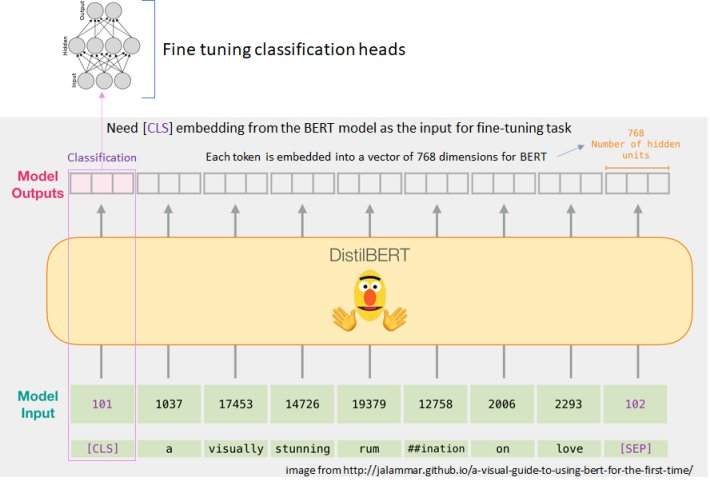


## What is the ouput?觀察Bert模型的輸出

    輸出有兩項: 若批量為25
    第0個: last_hidden_state=tensor(....)   torch.Size([25, 59, 768])  ==> 59 是 各批句子長度，各批長度都不一樣
    第1個: pooler_output=tensor(....)       torch.Size([25, 768])

    (1)last_hidden_state：shape是(batch_size, sequence_length, hidden_size)，hidden_size=768,它是模型輸出:批次的每個序列中每個標記的隱藏狀態
      
    (2)pooler_output：shape是(batch_size, hidden_size)，
    
    (3)hidden_states：這是輸出的一個可選項，如果輸出，需要指定config.output_hidden_states=True,它也是一個元組，它的第一個元素是embedding，其餘元素是各層的輸出，每個元素的形狀是(batch_size, sequence_length, hidden_size)
    
    attentions：這也是輸出的一個可選項，如果輸出，需要指定config.output_attentions=True,它也是一個元組，它的元素是每一層的注意力權重，用於計算self-attention heads的加權平均值
    
    outputs = bert_model(**token_out,output_hidden_states=True,output_attentions=True)

## About the last_hidden_state

    torch.Size([25, 59, 768])  
    ==>25是批量。 59 是各批一個句子有多少個字token(句子長度)，各批長度都不一樣，第一個字是CLS。768是向量維度
    
    做法有兩種: 必須試試看哪一種比較準確
    (1)last_hidden_state的輸出，進行global average pooling將3維度變成2維度[批量,768]
    (2)last_hidden_state的輸出，將3維度取得[CLS]切片，得到2維度[批量,768]

<img src='images/images-cls-state.jpg'>

<img src='https://i.stack.imgur.com/tjpn4.jpg' width='800'>

## Global Average Pooling (GAP)

    GAP的思路是使用GAP池化層的方式來降維，就是在底端的基礎模型(例如:BERT, Resnet50, CNN等卷積層)之後，用GAP替代FC全連線層。
    優點：
    (1)保留了前面底端的基礎模型提取到的空間信息\語義信息,所以在實際應用中效果提升也較爲明顯
    (2)與一般使用推平Flatten的方式比較，參數量較少(網路節點較少)，降低了參數數量會使模型更加健壯，抗過擬合效果更佳
    (3)GAP在特徵圖與最終的分類間轉換更加簡單，不會受到輸入大小的限制。

Global Average Pooling 1D
 
<img src='images/images-global-average-pooling.png' width="800">

Global Average Pooling 2D

在影像分類的任務中會使用Global Average Pooling 2D將一張RGB的3維度的影像降低到1個維度在接到FC層分類器，如下圖實例:

<img src='https://img2018.cnblogs.com/blog/891145/201811/891145-20181126095519997-676946079.png'  width='600'>

[來源]('https://www.itread01.com/content/1547374354.html')

# Load dataset

In [1]:
import pandas as pd

In [2]:
#df = pd.read_csv('news_dataset_preprocessed_for_django.csv',sep='|')
df = pd.read_csv('vaccine_preprocessed_2.csv',sep='|')

In [3]:
df.head(1)

,item_id,categories,titles,contents,sentiment,summary,top_key_freq,tokens,tokens_v2,entities,token_pos,urls
0,1,AZ,澎湖確診數升 兒童疫苗接種率已逾7成,澎湖COVID-19（2019冠狀病毒疾病）確診數攀升，澎湖縣政府今天公布新增182例，還有...,0.0,"['澎湖5至11歲兒童疫苗接種種率已逾7成', '澎湖縣政府今天公布新增182例確診案例',...","[('澎湖', 5), ('疫苗', 5), ('接種', 4), ('確診', 3), (...","['澎湖', 'COVID-19', '（', '2019', '冠狀', '病毒', '疾...","['澎湖', '冠狀', '病毒', '疾病', '確診數', '澎湖縣', '政府', '...","[NerToken(word='澎湖', ner='GPE', idx=(0, 2)), N...","[('澎湖', 'Nc'), ('COVID-19', 'FW'), ('（', 'PARE...",https://news.google.com/articles/CBMiMmh0dHBzO...


## Indexing: index to item_id

In [4]:
item_id2idx={}
idx2item_id={}
for id, i in df.item_id.items():
    item_id2idx[i] = id
    idx2item_id[id] = i

In [5]:
item_id2idx

{1: 0,
 2: 1,
 3: 2,
 4: 3,
 5: 4,
 6: 5,
 7: 6,
 8: 7,
 9: 8,
 10: 9,
 11: 10,
 12: 11,
 13: 12,
 14: 13,
 15: 14,
 16: 15,
 17: 16,
 18: 17,
 19: 18,
 20: 19,
 21: 20,
 22: 21,
 23: 22,
 24: 23,
 25: 24,
 26: 25,
 27: 26,
 28: 27,
 29: 28,
 30: 29,
 31: 30,
 32: 31,
 33: 32,
 34: 33,
 35: 34,
 36: 35,
 37: 36,
 38: 37,
 39: 38,
 40: 39,
 41: 40,
 42: 41,
 43: 42,
 44: 43,
 45: 44,
 46: 45,
 47: 46,
 48: 47,
 49: 48,
 50: 49,
 51: 50,
 52: 51,
 53: 52,
 54: 53,
 55: 54,
 56: 55,
 57: 56,
 58: 57,
 59: 58,
 60: 59,
 61: 60,
 62: 61,
 63: 62,
 64: 63,
 65: 64,
 66: 65,
 67: 66,
 68: 67,
 69: 68,
 70: 69,
 71: 70,
 72: 71,
 73: 72,
 74: 73,
 75: 74,
 76: 75,
 77: 76,
 78: 77,
 79: 78,
 80: 79,
 81: 80,
 82: 81,
 83: 82,
 84: 83,
 85: 84,
 86: 85,
 87: 86,
 88: 87,
 89: 88,
 90: 89,
 91: 90,
 92: 91,
 93: 92,
 94: 93,
 95: 94,
 96: 95,
 97: 96,
 98: 97,
 99: 98,
 100: 99,
 101: 100,
 102: 101,
 103: 102,
 104: 103,
 105: 104,
 106: 105,
 107: 106,
 108: 107,
 109: 108,
 110: 109,
 111: 11

# Load Bert model

In [ ]:
#!pip install transformers

In [ ]:
# !pip install torch
# pip install torch==1.6.0+cpu torchvision==0.7.0+cpu -f https://download.pytorch.org/whl/torch_stable.html

#!pip install torch==1.8.2+cpu torchvision==0.9.2+cpu torchaudio===0.8.2 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html


In [6]:
from transformers import AutoModel, AutoTokenizer
from transformers import BertTokenizer, BertModel
import torch
import numpy as np

In [9]:
#model = AutoModel.from_pretrained('ckiplab/albert-tiny-chinese') # 中研院更輕量BERT
model = AutoModel.from_pretrained('ckiplab/albert-base-chinese') # 中研院輕量BERT
#model = AutoModel.from_pretrained('bert-base-chinese') # Google
#model = BertModel.from_pretrained('bert-base-chinese', output_hidden_states=True)

Some weights of the model checkpoint at ckiplab/albert-base-chinese were not used when initializing AlbertModel: ['predictions.dense.weight', 'predictions.LayerNorm.bias', 'predictions.decoder.weight', 'predictions.LayerNorm.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.bias']
- This IS expected if you are initializing AlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertModel were not initialized from the model checkpoint at ckiplab/albert-base-chinese and are newly initialized: ['albert.pooler.bias', 'albert.pooler.weight']
You should probably TRAIN this model on a down-stream t

In [10]:
print(model)

AlbertModel(
  (embeddings): AlbertEmbeddings(
    (word_embeddings): Embedding(21128, 128, padding_idx=0)
    (position_embeddings): Embedding(512, 128)
    (token_type_embeddings): Embedding(2, 128)
    (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0, inplace=False)
  )
  (encoder): AlbertTransformer(
    (embedding_hidden_mapping_in): Linear(in_features=128, out_features=768, bias=True)
    (albert_layer_groups): ModuleList(
      (0): AlbertLayerGroup(
        (albert_layers): ModuleList(
          (0): AlbertLayer(
            (full_layer_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (attention): AlbertAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (attention_dropout): Dropout(p=0, inplace=False)
      

## Load tokenizer



In [11]:
tokenizer = AutoTokenizer.from_pretrained('ckiplab/albert-base-chinese')
#tokenizer = AutoTokenizer.from_pretrained('bert-base-chinese') # Google
# tokenizer = BertTokenizer.from_pretrained("bert-base-chinese")

In [12]:
tokenizer

PreTrainedTokenizerFast(name_or_path='ckiplab/albert-base-chinese', vocab_size=21128, model_max_len=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

# Tokenizer編碼

In [13]:
# (1) A string
sentences = '水果很多對人有好處，比如蘋果'
sentences_tokens = tokenizer(sentences, return_tensors='pt')
sentences_tokens

{'input_ids': tensor([[ 101, 3717, 3362, 2523, 1914, 2205,  782, 3300, 1962, 5993, 8024, 3683,
         1963, 5981, 3362,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [14]:
# (2) A list of a string (A list contains only a string element)
sentences = ['水果很多對人有好處，比如蘋果']
sentences_tokens = tokenizer(sentences, return_tensors='pt')
sentences_tokens

{'input_ids': tensor([[ 101, 3717, 3362, 2523, 1914, 2205,  782, 3300, 1962, 5993, 8024, 3683,
         1963, 5981, 3362,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [15]:
# (3) A list of batch strings (A list contains several string elements)
sentences = ['水果很多對人有好處，比如蘋果','外國手機有很多都不错，比如蘋果','我喜歡吃不同水果，比如蘋果']
sentences_tokens = tokenizer(sentences, return_tensors='pt', padding=True, truncation=True)
#sentences_tokens = tokenizer(sentences, return_tensors='pt') # error
#sentences_tokens = tokenizer(sentences, return_tensors='pt', max_length=20, padding='max_length')
sentences_tokens

{'input_ids': tensor([[ 101, 3717, 3362, 2523, 1914, 2205,  782, 3300, 1962, 5993, 8024, 3683,
         1963, 5981, 3362,  102,    0],
        [ 101, 1912, 1751, 2797, 3582, 3300, 2523, 1914, 6963,  679, 7231, 8024,
         3683, 1963, 5981, 3362,  102],
        [ 101, 2769, 1599, 3631, 1391,  679, 1398, 3717, 3362, 8024, 3683, 1963,
         5981, 3362,  102,    0,    0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]])}

# Bert的輸出

輸出的維度[3, 17, 768]，3表示批量，中間的維度17是字數，768是向量長度

In [16]:
# 送入模型取得輸出
# (2) A list of a string (A list contains only a string element)
sentences = ['水果很多對人有好處，比如蘋果']
#sentences = ['水果很多對人有好處，比如蘋果','外國手機有很多都不错，比如蘋果','我喜歡吃不同水果，比如蘋果']
sentences_tokens = tokenizer(sentences, return_tensors='pt', padding=True, truncation=True)
outputs = model(sentences_tokens.input_ids)

In [17]:
outputs

BaseModelOutputWithPooling(last_hidden_state=tensor([[[ 0.1013, -0.0104, -0.0303,  ...,  0.0479,  0.0259,  0.0390],
         [ 0.7448, -0.3410, -0.2156,  ...,  0.2374, -0.5448, -0.2546],
         [ 1.1505, -0.7310, -0.4481,  ...,  0.2867, -0.5794, -0.0653],
         ...,
         [ 0.1480,  0.0464, -0.1910,  ...,  0.0167, -0.5270, -0.1716],
         [ 0.6995, -0.3785,  0.0233,  ...,  0.0541, -0.7188,  0.2812],
         [ 0.0955, -0.0167, -0.0300,  ...,  0.0477,  0.0246,  0.0428]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[-1.0443e-02, -1.2244e-01, -6.2051e-02, -1.2264e-01,  2.4538e-02,
          4.7848e-02,  2.7581e-02, -3.2255e-02,  2.9726e-02, -1.8737e-01,
          6.1045e-02, -2.2514e-01,  1.7672e-01,  8.7039e-02,  8.1644e-02,
         -1.7220e-02, -1.5813e-02,  4.2528e-02, -7.5280e-02,  1.1200e-01,
         -3.0696e-02, -1.6988e-01, -9.5820e-02, -1.9391e-01,  5.5604e-02,
          7.8753e-03, -5.6966e-02, -2.1816e-02, -4.7688e-02, -7.1732e-02,
         -4

In [18]:
list(outputs)

['last_hidden_state', 'pooler_output']

In [19]:
outputs['last_hidden_state'].shape


torch.Size([1, 16, 768])

In [20]:
outputs['pooler_output'].shape

torch.Size([1, 768])

## 'last_hidden_state'向量平均

In [21]:
# 中間的維度是字數，此例是17
outputs['last_hidden_state'].shape

torch.Size([1, 16, 768])

In [22]:
last_hidden_state = outputs['last_hidden_state']

In [23]:
vectors = torch.mean(last_hidden_state, dim=1) # global_average_pooling shape (1, 768)

In [24]:
vectors.size()

torch.Size([1, 768])

In [25]:
vectors

tensor([[ 1.6976e-01, -1.6507e-01, -1.1538e-01,  6.0885e-02, -3.3758e-01,
          7.6232e-02, -4.1813e-02, -9.1156e-04,  5.3974e-02, -4.9231e-02,
         -3.1877e-02, -2.4234e-01,  3.2062e-01, -4.5942e-02, -1.2311e-01,
         -5.8557e-02, -1.1227e-01, -3.9124e-02,  4.6919e-01, -2.1179e-01,
         -7.7214e-02, -2.0720e-01, -5.5635e-02,  4.0997e-01,  1.3981e-01,
          1.1735e-01,  1.0266e-01,  2.2062e-01,  2.0268e-04,  2.7118e-02,
         -3.3598e-01, -7.8526e-01, -1.2152e-01,  1.8300e-01,  2.4748e-01,
         -2.2188e-01, -1.7569e-02,  2.8890e-02,  4.2054e-02, -2.7343e-03,
         -2.2754e-01, -6.0097e-02,  1.5023e-01,  8.0421e-03,  3.6072e-01,
         -3.3834e-01, -1.7850e-01, -1.3352e-01, -4.3545e-02,  1.3781e-01,
         -2.5791e-01,  8.7933e-02,  1.4905e-01,  8.6724e-02, -1.1089e-02,
         -2.0348e-02,  1.3039e-01, -1.8207e-01, -2.0819e-01, -2.5779e-01,
         -7.7849e-02, -1.0238e-01, -2.7244e-02, -1.4555e-01, -4.3418e-01,
         -6.0629e-02,  1.7174e-01, -4.

## Conver tensor to numpy for future usage

In [26]:
vectors

tensor([[ 1.6976e-01, -1.6507e-01, -1.1538e-01,  6.0885e-02, -3.3758e-01,
          7.6232e-02, -4.1813e-02, -9.1156e-04,  5.3974e-02, -4.9231e-02,
         -3.1877e-02, -2.4234e-01,  3.2062e-01, -4.5942e-02, -1.2311e-01,
         -5.8557e-02, -1.1227e-01, -3.9124e-02,  4.6919e-01, -2.1179e-01,
         -7.7214e-02, -2.0720e-01, -5.5635e-02,  4.0997e-01,  1.3981e-01,
          1.1735e-01,  1.0266e-01,  2.2062e-01,  2.0268e-04,  2.7118e-02,
         -3.3598e-01, -7.8526e-01, -1.2152e-01,  1.8300e-01,  2.4748e-01,
         -2.2188e-01, -1.7569e-02,  2.8890e-02,  4.2054e-02, -2.7343e-03,
         -2.2754e-01, -6.0097e-02,  1.5023e-01,  8.0421e-03,  3.6072e-01,
         -3.3834e-01, -1.7850e-01, -1.3352e-01, -4.3545e-02,  1.3781e-01,
         -2.5791e-01,  8.7933e-02,  1.4905e-01,  8.6724e-02, -1.1089e-02,
         -2.0348e-02,  1.3039e-01, -1.8207e-01, -2.0819e-01, -2.5779e-01,
         -7.7849e-02, -1.0238e-01, -2.7244e-02, -1.4555e-01, -4.3418e-01,
         -6.0629e-02,  1.7174e-01, -4.

In [31]:
# Error will arises
# vectors.numpy()

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [27]:
vectors.detach().numpy()

array([[ 1.69760108e-01, -1.65073663e-01, -1.15377285e-01,
         6.08854592e-02, -3.37576032e-01,  7.62322322e-02,
        -4.18130755e-02, -9.11558978e-04,  5.39744683e-02,
        -4.92311195e-02, -3.18767689e-02, -2.42336839e-01,
         3.20616424e-01, -4.59418558e-02, -1.23114362e-01,
        -5.85574433e-02, -1.12266399e-01, -3.91243286e-02,
         4.69185233e-01, -2.11785346e-01, -7.72140175e-02,
        -2.07203001e-01, -5.56351878e-02,  4.09969538e-01,
         1.39805585e-01,  1.17348567e-01,  1.02656938e-01,
         2.20622793e-01,  2.02679308e-04,  2.71175057e-02,
        -3.35977197e-01, -7.85260916e-01, -1.21520750e-01,
         1.83004647e-01,  2.47477874e-01, -2.21884131e-01,
        -1.75685436e-02,  2.88897511e-02,  4.20543142e-02,
        -2.73427786e-03, -2.27535635e-01, -6.00965358e-02,
         1.50226876e-01,  8.04206450e-03,  3.60715330e-01,
        -3.38335395e-01, -1.78499654e-01, -1.33520335e-01,
        -4.35447283e-02,  1.37811691e-01, -2.57908255e-0

In [28]:
with torch.no_grad():
    vectors.numpy()

# Calculate and get our news vectors 

處理新聞或文章長文本(超過512個字)

輸出的維度[5, 512, 768]，5表示批量，中間的維度512是字數，768是向量長度

In [29]:
# 送入模型取得輸出
# (2) A list of a string (A list contains only a string element)
sentences = df.contents[0:5].to_list()
sentences_tokens = tokenizer(sentences, return_tensors='pt', padding=True, truncation=True)
outputs = model(sentences_tokens.input_ids)

In [30]:
outputs

BaseModelOutputWithPooling(last_hidden_state=tensor([[[ 4.5294e-02,  6.8923e-03, -2.4707e-01,  ...,  1.0339e-01,
           6.5166e-01, -2.8055e-01],
         [ 1.3294e-01,  5.8795e-02,  6.2787e-01,  ..., -3.1194e-01,
           1.0823e-01,  1.8447e-01],
         [-7.3630e-01,  6.3455e-02,  2.0290e-01,  ...,  1.2692e-01,
          -8.1296e-02,  1.9754e-01],
         ...,
         [-2.6222e-01, -2.5971e-01, -2.3064e-01,  ...,  8.5218e-02,
           9.9629e-02, -9.3927e-02],
         [-3.3368e-01, -1.8825e-01,  3.7928e-02,  ...,  2.1045e-02,
           1.1597e-01, -1.6468e-01],
         [-2.0186e-01, -4.8247e-01, -5.7307e-01,  ...,  4.3777e-02,
           2.2264e-01, -1.3875e-01]],

        [[ 1.5799e-01,  1.1054e-02, -3.5785e-02,  ...,  3.8219e-01,
           3.5287e-01, -1.5441e-01],
         [-1.8254e-01, -3.4625e-01, -2.9633e-01,  ...,  4.7803e-01,
          -9.0851e-01,  7.1785e-01],
         [-6.6004e-01,  4.2973e-02, -5.0407e-01,  ..., -1.3513e-01,
          -1.6388e-01,  7.6594e

In [31]:
list(outputs)

['last_hidden_state', 'pooler_output']

In [32]:
outputs['last_hidden_state'].shape


torch.Size([5, 512, 768])

In [33]:
outputs['pooler_output'].shape

torch.Size([5, 768])

## 'last_hidden_state'向量平均

In [34]:
outputs['last_hidden_state'].shape

torch.Size([5, 512, 768])

In [35]:
last_hidden_state = outputs['last_hidden_state']

In [36]:
vectors = torch.mean(last_hidden_state, dim=1) # global_average_pooling shape (1, 768)

In [37]:
vectors.size()

torch.Size([5, 768])

# Process all news 處理所有的新聞文章取得其向量

### Only TWO lines to get Bert output 取得所有新聞向量特徵

In [38]:
sentences = ['水果很多對人有好處，比如蘋果','外國手機有很多都不错，比如蘋果','我喜歡吃不同水果，比如蘋果']

In [39]:
sentences_tokens = tokenizer(sentences, return_tensors='pt', padding=True, truncation=True)
vectors = torch.mean(model(sentences_tokens.input_ids)['last_hidden_state'], dim=1) # global_average_pooling shape (1, 768)

In [40]:
vectors

tensor([[ 0.0082, -0.1978, -0.1236,  ...,  0.1618, -0.2955,  0.0351],
        [ 0.0924,  0.0160,  0.0262,  ...,  0.1537, -0.3317,  0.0321],
        [-0.0609, -0.2085, -0.1737,  ...,  0.1453, -0.4900, -0.0351]],
       grad_fn=<MeanBackward1>)

In [41]:
vectors.shape

torch.Size([3, 768])

## Get article vector one by one 逐筆取得所有新聞文章向量
必須逐筆處理，或是逐批處理，若一次全輸入，記憶體會爆掉

In [42]:
def get_vector(sentence):
    tokens = tokenizer(sentence, return_tensors='pt', truncation=True, padding=True)
    vector = torch.mean(model(tokens.input_ids)['last_hidden_state'], dim=1).detach().numpy() # global_average_pooling shape (1, 768)
    #vector = torch.mean(model(tokens.input_ids)['last_hidden_state'], dim=1) # global_average_pooling shape (1, 768)
    return vector[0] # (1, 768)第一個維度是批量1 回傳其向量一維度即可

In [43]:
df.shape

(796, 12)

In [44]:
len(df.contents.to_list())

796

In [45]:
%%time
# It takes more than 2 minitues. 213 samples
sentences =  df.contents.to_list()
news_vectors = [get_vector(sentence) for sentence in sentences]

CPU times: total: 45min 36s
Wall time: 7min 36s


In [46]:
news_vectors = np.array(news_vectors)

In [47]:
news_vectors.shape

(796, 768)

In [48]:
len(news_vectors)

796

In [49]:
news_vectors[0].shape

(768,)

In [50]:
news_vectors[0]

array([ 2.69885659e-01, -1.90711811e-01,  1.50639964e-02,  1.66448012e-01,
       -6.07861400e-01,  1.26061484e-01,  1.51300253e-02,  3.03549767e-02,
        2.72015721e-01, -1.73093870e-01, -3.22774686e-02,  1.16457470e-01,
       -4.19570543e-02, -6.78414702e-02,  6.40978292e-02, -2.10778210e-02,
       -1.68506920e-01,  1.02310039e-01,  3.96144902e-03, -6.99906573e-02,
        9.53166261e-02, -4.01505381e-01, -2.32386608e-02,  4.44948167e-01,
        1.22952238e-01, -3.53017007e-03,  4.65322703e-01,  2.21050769e-01,
        1.66999161e-01, -1.66270986e-01, -2.39368737e-01,  6.46797776e-01,
       -8.58127549e-02, -1.03501067e-01,  1.78674549e-01, -6.37075976e-02,
        8.05151388e-02, -4.21226844e-02,  1.61646064e-02, -1.82247952e-01,
        9.72851515e-02, -1.90292343e-01, -2.28693917e-01, -8.89147967e-02,
       -4.01813745e-01, -1.63746670e-01, -3.22723359e-01,  2.97907572e-02,
        5.02038747e-02, -1.09260373e-01,  8.20283666e-02,  6.52114600e-02,
        6.95330277e-02,  

In [97]:
# # 全部一次放入記憶體會爆掉，必須分批次處理
# sentences =  df.content.to_list()
# sentences_tokens = tokenizer(sentences, return_tensors='pt', padding=True, truncation=True)
# news_vectors = torch.mean(model(sentences_tokens.input_ids)['last_hidden_state'], dim=1).detach().numpy() # global_average_pooling shape (1, 768)

## 向量特徵存檔

用到時讀出來即可。

In [47]:
# save to npy file
#np.savez_compressed('news_vectors.npz', news_vectors)
#news_vectors = np.load('news_vectors.npz')

In [51]:
np.save('news_vectors.npy',news_vectors)

In [52]:
news_vectors = np.load('news_vectors.npy')

In [53]:
news_vectors.shape

(796, 768)

In [54]:
news_vectors[0]

array([ 2.69885659e-01, -1.90711811e-01,  1.50639964e-02,  1.66448012e-01,
       -6.07861400e-01,  1.26061484e-01,  1.51300253e-02,  3.03549767e-02,
        2.72015721e-01, -1.73093870e-01, -3.22774686e-02,  1.16457470e-01,
       -4.19570543e-02, -6.78414702e-02,  6.40978292e-02, -2.10778210e-02,
       -1.68506920e-01,  1.02310039e-01,  3.96144902e-03, -6.99906573e-02,
        9.53166261e-02, -4.01505381e-01, -2.32386608e-02,  4.44948167e-01,
        1.22952238e-01, -3.53017007e-03,  4.65322703e-01,  2.21050769e-01,
        1.66999161e-01, -1.66270986e-01, -2.39368737e-01,  6.46797776e-01,
       -8.58127549e-02, -1.03501067e-01,  1.78674549e-01, -6.37075976e-02,
        8.05151388e-02, -4.21226844e-02,  1.61646064e-02, -1.82247952e-01,
        9.72851515e-02, -1.90292343e-01, -2.28693917e-01, -8.89147967e-02,
       -4.01813745e-01, -1.63746670e-01, -3.22723359e-01,  2.97907572e-02,
        5.02038747e-02, -1.09260373e-01,  8.20283666e-02,  6.52114600e-02,
        6.95330277e-02,  

## 所有文章之兩兩相似度矩陣

若日後會用到，可以存檔，用到時讀出來即可。

好處: 相較於向量，載入到記憶體，所占空間較少。

In [55]:
from sklearn.metrics.pairwise import cosine_similarity

In [56]:
news_sim_martrix = cosine_similarity(news_vectors, news_vectors)

In [57]:
news_sim_martrix.shape

(796, 796)

In [58]:
news_sim_martrix

array([[1.        , 0.8577324 , 0.9283546 , ..., 0.853668  , 0.7824096 ,
        0.8587448 ],
       [0.8577324 , 1.        , 0.79619414, ..., 0.95012784, 0.6327616 ,
        0.97186434],
       [0.9283546 , 0.79619414, 1.0000004 , ..., 0.81210184, 0.8544677 ,
        0.795104  ],
       ...,
       [0.853668  , 0.95012784, 0.81210184, ..., 1.0000001 , 0.6359547 ,
        0.9679518 ],
       [0.7824096 , 0.6327616 , 0.8544677 , ..., 0.6359547 , 1.0000002 ,
        0.6407591 ],
       [0.8587448 , 0.97186434, 0.795104  , ..., 0.9679518 , 0.6407591 ,
        0.9999999 ]], dtype=float32)

## Save similarity matrix相似矩陣存檔

In [59]:
import numpy as np

np.save('news_sim_martrix.npy', news_sim_martrix)

news_sim_martrix = np.load('news_sim_martrix.npy')

# Giben an article, find topk similar articles輸入一篇文章編號找出Topk相似的文章

以第0為例，列出其與其他0 1 2 3 4 新聞的相似度

設法去排序相似度，從大到小排列，先放到字典中 再加以排序!

In [62]:
item_id = 1

In [63]:
idx = item_id2idx[item_id]

In [64]:
idx

0

In [65]:
df.contents[0]

'澎湖COVID-19（2019冠狀病毒疾病）確診數攀升，澎湖縣政府今天公布新增182例，還有一名接種2劑疫苗的92歲確診女性不治。另外，澎湖5至11歲兒童疫苗接種種率已逾7成。澎湖縣政府表示，92歲女性長者己施打過2劑AZ疫苗，6日經診所通報確診，申請居家照護，7日因呼吸急性衰竭，送衛福部澎湖醫院急診，今天凌晨不幸過世，確切死因仍需由中央疫情指揮中心認定。澎湖縣政府表示，澎湖5至11歲兒童疫苗接種，全縣37所國小和9所幼兒園4569名學童中，目前完成莫德納與輝瑞兒童疫苗接種者，分別有1108和2278人，接種率逾7成。澎湖縣政府今天公布新增182例確診案例，外籍人士4例、外縣市1例，其餘177例均為澎湖籍，以20至29歲和30至39歲年齡層，各為31人最多，年紀最小是10個月大男童，最長為101歲女性，除集中檢疫所和三總各收治1例外，其餘全數申請居家照護照。澎湖累積有3896例確診，目前還收治有1030人。'

In [66]:
news_sim_martrix[0]

array([1.        , 0.8577324 , 0.9283546 , 0.8350728 , 0.84491515,
       0.8499739 , 0.94553626, 0.85721976, 0.9445167 , 0.85875404,
       0.8205571 , 0.8506931 , 0.85805446, 0.86968434, 0.91871077,
       0.94901085, 0.77775216, 0.8373644 , 0.86546326, 0.93423736,
       0.9120275 , 0.8608369 , 0.9432019 , 0.85305125, 0.86031425,
       0.86171013, 0.8966484 , 0.84753585, 0.8506766 , 0.85517985,
       0.94886804, 0.8523972 , 0.86483264, 0.8455106 , 0.9311109 ,
       0.855201  , 0.93595475, 0.8528276 , 0.8576288 , 0.9130043 ,
       0.8432647 , 0.85530895, 0.861858  , 0.8642226 , 0.9450809 ,
       0.9465506 , 0.8471748 , 0.8495383 , 0.846722  , 0.8619251 ,
       0.84406334, 0.8573401 , 0.9425538 , 0.93619585, 0.84922254,
       0.8615557 , 0.92963684, 0.8537413 , 0.86062545, 0.8546165 ,
       0.8491643 , 0.85204434, 0.8645701 , 0.8528832 , 0.8557117 ,
       0.85545814, 0.9447484 , 0.9227653 , 0.96488595, 0.8525221 ,
       0.85645115, 0.86966395, 0.8389679 , 0.85867536, 0.93567

In [67]:
news_sim_martrix[0][:20]

array([1.        , 0.8577324 , 0.9283546 , 0.8350728 , 0.84491515,
       0.8499739 , 0.94553626, 0.85721976, 0.9445167 , 0.85875404,
       0.8205571 , 0.8506931 , 0.85805446, 0.86968434, 0.91871077,
       0.94901085, 0.77775216, 0.8373644 , 0.86546326, 0.93423736],
      dtype=float32)

## Sort 排序取最相似的k個新聞與相似度

In [68]:
sim_dict = {}
idx = item_id2idx[item_id]  # 0 for 'aipl_20220314_1'
for i, value in enumerate(news_sim_martrix[idx]):
    sim_dict[i]=value

In [69]:
sim_dict

{0: 1.0,
 1: 0.8577324,
 2: 0.9283546,
 3: 0.8350728,
 4: 0.84491515,
 5: 0.8499739,
 6: 0.94553626,
 7: 0.85721976,
 8: 0.9445167,
 9: 0.85875404,
 10: 0.8205571,
 11: 0.8506931,
 12: 0.85805446,
 13: 0.86968434,
 14: 0.91871077,
 15: 0.94901085,
 16: 0.77775216,
 17: 0.8373644,
 18: 0.86546326,
 19: 0.93423736,
 20: 0.9120275,
 21: 0.8608369,
 22: 0.9432019,
 23: 0.85305125,
 24: 0.86031425,
 25: 0.86171013,
 26: 0.8966484,
 27: 0.84753585,
 28: 0.8506766,
 29: 0.85517985,
 30: 0.94886804,
 31: 0.8523972,
 32: 0.86483264,
 33: 0.8455106,
 34: 0.9311109,
 35: 0.855201,
 36: 0.93595475,
 37: 0.8528276,
 38: 0.8576288,
 39: 0.9130043,
 40: 0.8432647,
 41: 0.85530895,
 42: 0.861858,
 43: 0.8642226,
 44: 0.9450809,
 45: 0.9465506,
 46: 0.8471748,
 47: 0.8495383,
 48: 0.846722,
 49: 0.8619251,
 50: 0.84406334,
 51: 0.8573401,
 52: 0.9425538,
 53: 0.93619585,
 54: 0.84922254,
 55: 0.8615557,
 56: 0.92963684,
 57: 0.8537413,
 58: 0.86062545,
 59: 0.8546165,
 60: 0.8491643,
 61: 0.85204434,
 

In [71]:
df.contents[11]

'研究顯示，AZ混打莫德納疫苗對Delta保護力優於2劑AZ疫苗。指揮中心今天表示，完整接種AZ疫苗可有效預防重症、死亡，副作用也比混打少，呼籲打AZ的民眾無須悲觀以對。台大醫院今天公布COVID-19（2019冠狀病毒疾病）疫苗混打試驗成果，AZ混打莫德納疫苗不僅抗體濃度比打2劑AZ疫苗者高，體外試驗也發現，接種14天後對抗最早在印度發現的Delta變異株的保護力達到100%，是2劑AZ疫苗的5倍。台灣大學副校長、中央流行疫情指揮中心專家諮詢小組召集人張上淳今天接受記者電話聯訪時解釋，該研究用受試者稀釋40倍的血液，測試能否中和病毒，若能順利中和病毒則視為具有保護力，並不代表在真實世界中也擁有100%保護力。研究結果出爐後，有不少接種2劑AZ疫苗的民眾擔心保護力不足。中央流行疫情指揮中心醫療應變組副組長羅一鈞今天下午在疫情記者會中表示，評估疫苗的效果除了要考慮保護力，也要一併考量抗體效價、副作用等問題，以及真實世界中的確診情形，畢竟疫苗接種一段時間後，保護力會逐漸下降，也可能出現突破性感染等狀況。羅一鈞並指出，該研究2劑AZ疫苗接種僅相隔8週，真實世界中可能長達12週，且根據國外數據顯示，2劑AZ疫苗間隔愈長，抗體生成、保護力都比較好，呼籲民眾不用悲觀地認為打2劑AZ疫苗效果較差，實際上對於預防重症、死亡的保護效果都不錯，副作用也比混打來得輕微。指揮中心指揮官陳時中表示，無論打2劑同廠牌疫苗，或是混打2種不同廠牌疫苗，都有其利和弊，民眾可自己做最好選擇。另外，有專家質疑指揮中心開放接種高端疫苗者，有出國需求，可混打其他國際認證疫苗，形同否定高端疫苗。陳時中反問：「要不然要怎麼辦」，政府總不可能讓民眾打完高端疫苗，結果飛到美國無法入境，又被趕回來，因此才會開放有出國需求者接種其他疫苗，目的是解決入境的問題，但強調混打不同廠牌疫苗就是有其風險。'

In [72]:
from operator import itemgetter
sorted_sim_dict = sorted(sim_dict.items(), key= itemgetter(1), reverse=True)

In [73]:
topk_sim_dict = sorted_sim_dict[1:3] # skip 0 自己跟自己的相似度

In [74]:
for idx, value in topk_sim_dict:
    print(value, df.contents.iloc[idx])

0.96921134 為鼓勵長者施打疫苗，花蓮縣政府今天指出，縣內65歲以上、原住民族55歲以上長者即日起施打疫苗，加贈2劑快篩試劑，施打第1、2劑者加碼價值新台幣500元衛教品。花蓮縣政府下午召開COVID-19（2019冠狀病毒疾病）記者會，衛生局長朱家祥指出，為鼓勵長者打疫苗，即日起至6月30日，65歲以上長者及55歲原民長者接種疫苗可獲2劑快篩試劑；5月31日前長者施打第1、2劑縣府加碼500元衛教品。朱家祥表示，縣內提供「0+7」自主防疫者、「3+4」居家隔離及自主防疫者，每人2劑、3劑快篩試劑，同住家人可憑健保卡及身分證領取快篩試劑。朱家祥指出，花蓮新增確診人數1291例，其中18歲以下占2成，與上週實體課程期間確診比例差不多，顯示實體課程與遠距教學對與染疫比率並無顯著影響。不過記者會後，縣府改發布快訊，宣布花蓮縣高中以下（公私立含幼兒園）暫停實體課程，延長遠距教學至6月2日。花蓮縣政府教育處代理處長翁書敏表示，縣府調查5歲至17歲校院接種BNT疫苗意願，共計發出3萬1859份問卷，目前回收2萬4087份，同意接種比例為61.24%，呼籲尚未繳回意願表的家長，盡快評估回報，以利學校施打作業。
0.9670428 苗栗縣今天新增確診COVID-19（2019冠狀病毒疾病）1509例，針對65歲以上長者施打第4劑疫苗，18日將在7鄉鎮開設大型接種站，其餘11鄉鎮由轄區衛生所規劃施打日程。苗栗縣衛生局透過新聞稿指出，縣內今天新增確診1509例，年齡分布1歲以下至95歲，單日確診人數仍在高原期。衛生局統計，至6月18日止，縣內符合第4劑疫苗施打資格之65歲以上長者約有2萬2300餘人，將結合縣內醫院，利用18日週六上午，在苗栗、頭份、竹南、公館、後龍、苑裡、通霄7鄉鎮市同步開設莫德納疫苗大型接種站，優先提供65歲以上及55歲以上原住民長者接種疫苗，各場最後1小時也開放一般民眾施打。衛生局表示，其餘11鄉鎮則由轄區衛生所依村里規劃施打日程，長者依公告時段前往衛生所接種，相關訊息可上縣府衛生局網站查詢。衛生局長張蕊仙提醒，依據衛福部疾管署規定，建議染疫康復者於發病日或確診日（無症狀感染者）起，至少間隔3個月後，再施打COVID-19疫苗。


## Define get_topk_news()

寫成一個方法，方便呼叫

In [75]:
from operator import itemgetter
import pandas as pd
import numpy as np

In [76]:
df = pd.read_csv('vaccine_preprocessed_2.csv',sep='|')

In [77]:
news_sim_martrix = np.load('news_sim_martrix.npy')

In [78]:
item_id2idx={}
idx2item_id={}
for id, i in df.item_id.items():
    item_id2idx[i] = id
    idx2item_id[id] = i

In [79]:
def get_topk_news(item_id, news_sim_martrix, topk=3):
    sim_dict = {}
    idx = item_id2idx[item_id]
    for i, value in enumerate(news_sim_martrix[idx]):
        sim_dict[i]=value
    topk = sorted(sim_dict.items(), key= itemgetter(1), reverse=True)[1:topk+1]
    return topk

In [80]:
item_id = 4
#item_id = 'acn_20220313_20'
news_sim = get_topk_news(item_id, news_sim_martrix, topk=3)

In [81]:
for idx, value in news_sim:
    print(value, df.contents.iloc[idx])

0.9842006 全球對抗新冠肺炎(COVID-19)疫情的日子已超過一年半，疫情下的艱困日常還有防疫疲勞，都讓人迫切關注疫情止息的線索。其中「群體免疫」是不少人的盼望，也是大多數國家努力的目標。但AZ(AstraZeneca)疫苗研發者竟然在日前受訪時大潑冷水，直言Delta病毒株的出現讓全球「不可能」實現群體免疫(herd immunity)，真是比悲傷更悲傷的事。根據世界衛生組織(WHO)定義，群體免疫是一種對傳染病的間接保護。當人群透過接種疫苗或者因為曾罹患該疾病而有免疫力，就會形成。針對當前全球正在對抗的新冠肺炎(COVID-19)疫情，世衛也支持透過接種疫苗來實現群體免疫的願景，而非放任疾病在部分人群中蔓延，造成不必要的染病或死亡。《自然》(Nature)期刊一篇研究指出，大多數傳染病的群體免疫門檻落在60%~70%之間。若你曾關注過台灣或其他國家宣告的群體免疫門檻，或許都差不多。但是牛津大學疫苗研究小組負責人，同時也是AZ疫苗研發者之一的Sir Andrew Pollard日前受訪時指出，Delta變種病毒的出現，已使得人類不可能達到COVID-19群體免疫。為什麼新冠肺炎群體免疫的終極目標無法實現？Pollard博士指出，是因為已證實Delta病毒株能感染完整接種疫苗者。換言之，完整接種疫苗僅能減緩疾病的傳播效率，無法完全阻隔病毒。Delta病毒使得COVID-19無法像麻疹一樣，只要有95%人口接種疫苗，就可防止病毒傳播。Delta病毒會讓已接種疫苗者也成為目標，也就是讓未接種疫苗者總有一天會受到感染，無法實現群體免疫的願景；除此之外，Pollard博士指出，目前人類缺乏可完全阻隔COVID-19疫情的技術。雖然完整接種後仍有突破性感染的風險，但並不代表疫苗無效。因為完整接種疫苗在感染Delta病毒後的症狀明顯減輕，大多數都是輕症，僅有極為少數的人住院或是死亡。在美國，絕大多數染疫住院者都是未接種疫苗的人，而完整接種的人住院比例僅有0.1%~5%，死亡率僅0.2%~0.6%。正是因為新冠病毒突變速度非常快，Pollard博士提醒下一個變種病毒的傳染力可能比Delta更高。因此思考與COVID-19共存的方式，還有加緊研發COVID-19療法更刻不容緩。因為接種疫苗對於部分免疫力低下的人來說效果不高，產生的保護力較低，因此數年內可能仍有不少人染疫後